<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Problemas de clasificación y regresión.
* Regresión lineal ordinaria (mínimos cuadrados).
* Selección de atributos y parámetros de regularización en regresión lineal (Ridge y Lasso).
* Validación cruzada.
* Reducción de dimensionalidad: PCA e ICA.
* Selección de hiper-parámetros estructurales de modelos de aprendizaje.

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 4 Octubre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea1-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Máquinas de aprendizaje aplicadas a la medicina  
[2.](#segundo) Estimación de edad de personas

<a id="primero"></a>
## 1. Máquinas de aprendizaje aplicadas a la medicina
En el area de la salud, diagnosticar la enfermedad de una persona de forma rápida y correcta puede llegar a salvarle la vida. Los encargados de realizar estos diagnósticos, son médicos que, observando exámenes y ciertos indicadores, pueden concluir qué enfermedad presenta el paciente. Si el médico se llegase a equivocar, aparte de que el paciente pueda perder la vida, el medico podría ser demandado por negligencia arriesgando años de cárcel o pagar sumas de dinero considerable, es por estas razones que es importante no cometer errores.  
Pongámonos en el contexto de que usted es contratado para utilizar técnicas de aprendizaje de máquina para asistir en un problema médico como es la detección de enfermedades cardiacas. El diagnóstico de una enfermedad cardiaca se realiza a través de signos clínicos y resultados de pruebas médicas, los cuales usted deberá utilizar en busca del comportamiento normal y anormal de los pacientes, para así obtener un modelo que prediga si el paciente en efecto presenta una enfermedad o no.


<img src="https://www.scripps.edu/_files/images/science-and-medicines/600x400_heart_illustration_xray.jpg" width="35%" />


Los datos para trabajar junto a su documentación pueden ser descargados ejecutando los siguientes comandos en un terminal (*sistemas UNIX*):
```
wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat
wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.doc
```

---
Cargue los datos a trabajar en un *dataframe* de pandas. Exprese las variables que tienen valores categóricos en su estructura original, para así tener una información más clara de lo que significa en un comienzo. 
```python
import pandas as pd
import numpy as np
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = 'reversable defect'
```

> a) Visualice los datos trabajados describiendo el comportamiento de las variables para entender el problema al que se enfrenta. ¿Qué ocurre con el comportamiento entre pacientes sanos y enfermos? Haga gráficos si estima conveniente (histogramas, boxplots, etc).
```python
df.head()
df.info()
df.describe()
```

> b) Debido a que utilizaremos modelos lineales, necesitaremos una representación adecuada de los datos. Codifique las variables con valores categóricos para ser representados como *one hot vectors*, indicando con un 1 la presencia del atributo en cuestión. Por ejemplo, si un paciente tiene el atributo "sex: female", quedará codificado como [0,1], mientras que si tiene el atributo "sex: male", quedará como [1,0]. **Explique la importancia de éste paso.**
```python
df = pd.get_dummies(df)
df.head()
```

### Predecir la presión sanguínea

En primera instancia trabajaremos en el dominio de regresión para predecir el comportamiento de alguna de las variables involucradas con el fin de entender cómo se comportan y si es posible estimar alguna de ellas a partir de las otras. Como ayuda se le indica que una alta presión sanguínea (*blood preasure*) podría ser un indicador de riesgo en temas cardíacos, en específico, para el problema se le comenta la hipótesis de que el comportamiento anormal de la variable presión sanguínea es un buen indicador para la detección de enfermedades cardíacas. 
Su objetivo dada esta información será la de predecir el comportamiento de esta variable en función de las otras, para luego detectar qué tan distante es el valor real al valor predecido y así detectar las enfermedades.


> c) Extraiga la información de la enfermedad cardíaca (*clase binaria*) además de la variable continua que nos intereserá predecir en esta instancia (*target*) con un modelo de regresión lineal.
```python
class_label = df.pop("normal").values -1 # 0 means absence, 1 means presence
reg_label = df.pop("blood_p").values
X_data = df.values
```

> d) Cree un conjunto de pruebas para evaluar los modelos construidos en el problema. Extraiga el 30\% de los datos del conjunto total para representar el conjunto de pruebas.
```python
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30
...
X_train = X_data[~mask_test] 
X_test = X_data[mask_test] 
...
reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]
...
class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]
...
print("Train: ",X_train.shape)
print("Test: ",X_test.shape)
```

> e) Realice una estandarización normal de los datos de entrada al modelo (*input*). **Comente la importancia/conveniencia de realizar este paso**. 
```python
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)
```

> f) Realice una regresión lineal de mı́nimos cuadrados básica para predecir el nivel de presión sanguínea. Mida los errores de predicción para cada dato en el conjunto de entrenamiento. Utilizando un *quantile-quantile plot* determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.
```python
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)
...
reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)
```

> g) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? ¿Qué variables están más correlacionadas con la respuesta?


> h) Para evaluar la calidad de las predicciones del modelo sobre el problema utilice el error absoluto medio (*mean absolute error*). Comente los resultados sobre en ambos conjuntos y la interpretación que se le da a la métrica de evaluación en el problema.
```python
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE train: ", mean_squared_error(reg_label_train, reg_pred_train))
print("MSE test: ", mean_squared_error(reg_label_test, reg_pred_test))
```

> i) Estime la calidad del modelo usando validación cruzada con un número de *fold* igual a $K=1$ (*leave-one-out*) y $K=5$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Compare esta estimación *vs* la calidad real (en conjunto de pruebas) y concluya.
```python
from sklearn.model_selection import KFold
kf = KFold(n_splits=K)
mse_cv = 0
for train, val in kf.split(Xstd_train):
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
mse_cv = mse_cv / K
```

> j) Debido a la creación de varias columnas *dummys* en el punto b), experimente con técnicas de regularización para mejorar el desempeño de su modelo. Para ésto ajuste un modelo lineal utilizando "*Ridge Regression*", es decir, regularizando con la norma $l_2$, varíe los parámetros de regularización si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. 
```python
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()
```

> k) Ahora experimente regularizando con la norma $l_1$, lo que corresponde a utilizar el método "*Lasso*". Vuelva a realizar el gráfico mostrando los coeficientes obtenidos, describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?
```python
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
... #plot again
```

> l) Evalúe la calidad de estos dos modelos en ambos conjuntos a distintos valores del parámetro de regularización. Haga uso de la *widget* interactiva de *ipython*. Comente ¿Con qué valor de *alpha* se quedaría en cada caso?
```python
from ipywidgets import interactive
def train_model(param):
    model = #define the model (Ridge and Lasso)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -10 #define your range
p_max = 10 #define your range
interactive(train_model, param=(p_min,p_max))
```

> m) De manera más estricta un médico le solicita un modelo que solo cuente con 5 características (variables) para predecir el nivel de presión sanguínea. Usted bien conoce un método que selecciona características de manera iterativa (*greedy*), con la idea de que la característica seleccionada tenga el mejor aporte sobre el desempeño del modelo. Construya una función que implemente *Forward Step-wise Selection* (FSS) sobre el modelo de regresión lineal clásico.  Para seleccionar localmente una característica, **proponga/implemente un criterio distinto al utilizado en el código de ejemplo** (**no** utilice el conjunto de pruebas). Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo.
```python
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train =  predictions_train - y
            error_candidate =  np.mean(np.power(residuals_train, 2))
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
    return selected
features_fss = fss(Xstd_train, reg_label_train, names_regressors)
need_feat = features_fss[:5]
```

> n) Realice otra modificación al algoritmo FSS anterior, en donde se deba entrenar el modelo predictor una sola vez. Cree alguna huerística de selección que le permita realizar ésto.

> o) Realice una modificación a los datos y agregue entre 10 a 100 atributos falsos, es decir, atributos aleatorios generados que no tienen relación con la variable de predicción (*target*). Para ésto utilice una distribución normal con valor esperado diferente de 0 y una cierta desviación estándar. Utilice alguna de las técnicas de selección de atributos (Ridge, Lasso, FSS) para evaluar la efectividad en eliminar estos atributos falsos ¿Depende del nivel de ruido (desviación estándar)?
```python
D = #number of fake features
F = np.random.normal(loc = mu, scale = std, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)
```


### Detectar una enfermedad 
Con toda la información obtenida de la experimentación previa, deberá hacer la predicción de la enfermedad cardíaca, ésto es un problema binario de clasificación de dos clases (presencia o ausencia de la enfermedad). Para explorar la hipótesis que le fue entregada en un inicio, de que el comportamiento anormal (*outlier*) de presión sanguínea sobre las personas es un indicio de alguna enfermedad, deberá utilizar los datos de los pacientes que se encuentran sanos (comportamiento normal).

> p) Entrene un modelo de regresión lineal, el mejor explorado en la experimentación previa, para predecir la presión sanguínea de los pacientes sanos, así obtener un modelo que estima cuál debiera ser el nivel sanguíneo en base al resto de información del paciente.
```python
mask_norm = class_label_train == 0 
model = #choose yor model..
model.fit(Xstd_train[mask_norm], reg_label_train[mask_norm])
...
blood_p_tr = model.predict(Xstd_train) 
blood_p_te = model.predict(Xstd_test) 
```

> q) Realice una clasificación de los pacientes a través de definir un umbral de decisión óptimo sobre la presión sanguínea estimada por el modelo. Por ejemplo, una cantidad mayor a $p$ es considerado como anormal (enfermo). Para ésto utilice la distribución predicha de este atributo para poder separar correctamente entre los dos tipos de comportamiento, normal (sano) y anormal (enfermo).
```python
import seaborn as sns
sns.distplot(blood_p_tr[mask_norm], label="normal behavior")
sns.distplot(blood_p_tr[~mask_norm], label="ill person behavior")
plt.show()
def predict_umbr(data, umbral_up, umbral_low):
    preds = []
    for value in data:
        if value > umbral_up or value < umbral_low:
            preds.append(1) #presencia
        else:
            preds.append(0)
    return np.asarray(preds)
pred_train = predict_umbr(blood_p_tr, p_up, p_low)
pred_test = predict_umbr(blood_p_te, p_up, p_low)
```

> r) Mida la calidad de la clasificación entregada a través de la exactitud (*accuracy*) sobre ambos conjuntos. Evalúe si es necesario variar la decisión sobre el umbral del punto anterior. *Recuerde que, al ser un problema binario, el mínimo que se espera es por sobre 50\%*
```python
from sklearn.metrics import accuracy_score
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 
```

> s) Compare su *framework* de clasificación con un modelo lineal simple de clasificación binaria como el *perceptrón*, el cual se entrenará para aprender directamente la tarea (de manera supervisada), sin utilizar la información de presión sanguínea. Comente sobre las diferencias, ventajas y desventajas, de cada *approach*.
```python
from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(Xstd_train, class_label_train)
pred_train = model.predict(Xstd_train) 
pred_test = model.predict(Xstd_test)
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 
```

> t) Para poder darle una explicación más visual a la clasificación de ambos modelos, y así entender mejor dónde podría estar el error, proyecte los datos en 2 dimensiones. Utilice la técnica de reducción de dimensionalidad **PCA** para representar los datos en las dimensiones deseadas. Comente sobre el comportamiento, puede colorear los datos dado el estado del paciente (enfermedad) y/o la predicción de alguno de los modelos (Perceptrón o con umbral).
```python
from sklearn.decomposition import PCA
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1])
plt.show()
```

> u) Vuelve a realizar lo anterior pero con otra técnica de reducción de dimensionalidad, como por ejemplo **ICA** [[3]](#refs). Comente
```python
from sklearn.decomposition import FastICA
...
```

> v) ¿Qué tanto se ve afectada la calidad de predicción si se utiliza la representación reducida generada por PCA vs la representación original? ¿Es esperable este fenómeno? ¿Podría mejorar la calidad de predicción? Proponga e implemente un criterio para seleccionar el número de componentes $d$ en PCA. Comente

<a id="segundo"></a>
## 2. Estimación de edad de personas
El problema de inferir ciertas características de una persona a través de una foto de ella puede resultar bastante dificil incluso para nosotros, como por ejemplo de qué país es, la emoción que expresa, la edad que tiene, o el género. La automatización de este proceso para que máquinas logren identificar ciertas características de una persona puede ser algo crucial para el futuro desarrollo de Inteligencia Artificial.

<img src="https://i.imgur.com/6B072GE.jpg" width="60%" height="20%" />


En esta actividad trabajaremos con unos datos (imágenes) en el **objetivo** de predecir la **edad** (*target value*) de la persona presente en la imagen. Los datos corresponden a 3640 imágenes de rostros de personas extraídos de la plataforma Flickr, pero, debido a que trabajamos con redes *feed forward*, se trabajará con representaciones de alto nivel, extraídas manualmente (no-aprendibles). Para ésto necesitará descargar los datos del siguiente __[link](http://chenlab.ece.cornell.edu/people/Andy/ImagesOfGroups.html)__ en el extracto de *ageGenderClassification* o a través de la consola Unix.
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/ageGenderClassification.zip
```

Se trabajará con archivos *.mat* que pueden ser cargados de la siguiente manera:
```python
import scipy.io as sio
mat_file = sio.loadmat("event.mat")
```
Mientras que para acceder a la información como tal:
```python
data = mat_file["trcoll"][0][0] # is "tecoll" for testing set
age_true = data[1] #target
...
genFeat = data[0]   # Contextual features
ffcoefs = data[3]   # Fisherface space
faceGist = data[4]  # GIST features
...
```

Para descripción sobre las columnas están en el archivo readme a través del siguiente __[link](http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt)__ o a través de la consola Unix:
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt
```

Existen distintas representaciones (descriptores) que usted podrá trabajar y entregársela como *input* a su modelo. Está la libertad de cómo desea trabajar este problema para detectar la edad de la persona, ya sea combinando los descriptores, teniendo un modelo para cada uno, definiendo rangos de edad o cualquier idea que se le ocurra. 

#### Importante
* Recuerde que el conjunto de pruebas está para evaluar su modelo final, **no puede tomar decisiones basadas en este conjunto**. *Sin embargo, Puede generar un conjunto de validación desde el conjunto de entrenamiento o utilizar validación cruzada*.

* La métrica de evaluación será MAPE (*Mean Absolute Percetage Error*).
```python
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```
* Se evaluará la extensión de su experimentación, la correctitud y su creatividad al desarrollar la actividad.

#### --- Bonus ---
Si desea comparar la calidad de solución respecto a otros estudiantes podrá realizar un *submission* de sus resultados en el conjunto de pruebas en la plataforma de __[Kaggle](https://www.kaggle.com/c/t1-ml/)__ a través del siguiente __[link](https://www.kaggle.com/t/3f3c4a759ec3482ab06c06ec91187742)__.

El archivo de *submission* debe contener una columna de *id* asociado a cada conjunto de pruebas, iniciando en 1, se puede generar de la siguiente manera:
```python
ids = np.arange(1, 1+y_pred.shape[0]).reshape(-1,1)
sub_est = np.concatenate([ids, y_pred], axis=-1)
import pandas as pd
df_aux = pd.DataFrame(sub_est, columns=["id","age"])
df_aux.to_csv("test_estimation.csv", index=False)
```

> Para los 3 primeros lugares se otorgará 5, 10 y 15 puntos respectivos en su nota final de esta tarea. 

## 1.- Predicción de enfermedades y presión sanguínea

In [65]:
#se parten importando las variables necesarias e importando datos y variables

import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = "reversable defect"

In [66]:
#se presenta la ifnormación de variables que tienen valores numéricos primero
df.head()
df.describe()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370,1.444444
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896,0.497827
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000,1.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000,1.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000,1.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000,2.000000


En esta tabla, se puede observar en qué rango podrían presentarse con mayor probabilidad los pacientes que no posean enfermedades cardiacas, siendo de especial consideración en este caso los valores de blood_p, serum, max_heart y oldpeak, ya que tienen mayor relación con lo que se busca obtener. Además, es posible inferir de acuerdo con los valores obtenidos que, aproximadamente, una presión sanguínea normal se mueve entre 120 y 140, mientras que un valor normal de serum cholesterol se mueve entre 213 y 245 aproximadamente. En el caso de oras variables el promedio resulta menos efectivo para indicar un rango de comportamiento normal, ya que dependen de la edad, tal es el caso de la frecuencia cardiaca. Finalmente, oldpeak parece estar relacionada con ST depression, por lo que tiene sentido que la media sea cercana a 1, y por su parte, vessel presenta una alta desviación estándar, lo que explica la presencia de outliers y que la mediana sea 0, al igual que el primer cuartil, estando la media cercana a 1.

In [67]:
#uso de one hot vectors incorporado a df
df = pd.get_dummies(df)
df.head()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal,sex_female,sex_male,chest_pain_asymptomatic,...,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,130.0,322.0,109.0,2.4,3.0,2,0,1,1,...,1,0,1,0,0,1,0,0,1,0
1,67.0,115.0,564.0,160.0,1.6,0.0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0.0,2,0,1,0,...,0,1,1,0,0,0,1,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1.0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0


En este dataset, hay variables que no toman valores continuos, por lo que un análisis como el realizado anteriormente no aplica en estos casos, sin embargo, algunas de estas resultan ser de vital importancia para la predicción que se busca hacer, como por ejemplo la presencia o no de enginas, es por esto que el uso de one hot vectors es tan relevante en este caso, ya que de otra forma el análisis de este tipo de variables resulta más complicado, no permitiendo realizar análisis sobre este tipo de variables

In [68]:
#extracción de datos relevantes a usar

class_label = df.pop("normal").values -1 # 0 means absence, 1 means presence
reg_label = df.pop("blood_p").values
X_data = df.values

In [69]:
#separación y creación de conjunto de prueba

np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30

X_train = X_data[~mask_test]
X_test = X_data[mask_test] 



reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]

class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]


In [70]:
#estandarización normal

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)

La estandarización normal en la variable predictora, en este caso, sirve para ajustar los valores obtenidos en la predicción, ya que, por una parte, al estandarizar el valor del promedio pasar a ser 0, lo que significa que el intercepto en y será alcanzado cuando la variable x esté en su promedio, suposición que resulta bastante realista. Además, el uso de la estandarización permite una mejor interpretación de los valores, ya que su rango se encuentra entre 0 y 1.

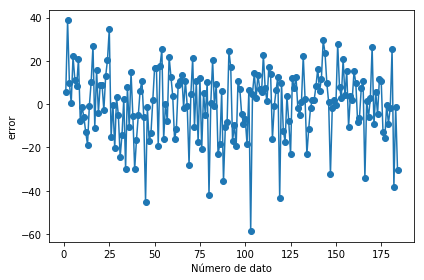

In [71]:
#realización de regresión lineal y comparación de errores

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)
...
reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)


pred_error=reg_pred_train-reg_label_train

# Se grafican los errores obtenidos en el conjunto de entrenamineto
plt.plot(range(1, len(pred_error) + 1), pred_error, marker='o')
plt.xlabel('Número de dato')
plt.ylabel('error')
plt.tight_layout()
plt.show()




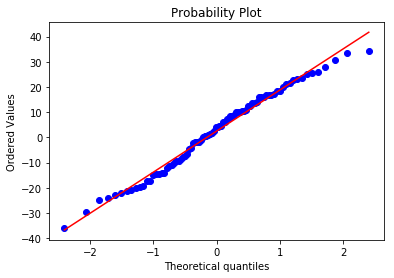

In [72]:
#qqplot de errores en los datos de testing

test_e=reg_pred_test-reg_label_test

import pylab 
import scipy.stats as stats


stats.probplot(test_e, dist="norm", plot=pylab)
pylab.show()

De acuerdo con lo que se puede observar, el supuesto de que los residuos siguen una distribución normal resulta bastante acertado, ya que los valores son bastante cercanos a la recta que se observa en el qqplot, teniendo en cuenta que la cercanía de un valor a ésta indica qué tanto este valor se acerca al comportamiento normal. Así mismo, se comprueba la efectividad del entrenamiento, cuyos errores pueden apreciarse en el plot generado justo antes del qqplot de residuos de los datos de testing

In [73]:
#implementación de f-score

import numpy as np
from scipy.sparse import *
from skfeature.utility.construct_W import construct_W

    
def fisher_score(X, y):
    """
    This function implements the fisher score feature selection, steps are as follows:
    1. Construct the affinity matrix W in fisher score way
    2. For the r-th feature, we define fr = X(:,r), D = diag(W*ones), ones = [1,...,1]', L = D - W
    3. Let fr_hat = fr - (fr'*D*ones)*ones/(ones'*D*ones)
    4. Fisher score for the r-th feature is score = (fr_hat'*D*fr_hat)/(fr_hat'*L*fr_hat)-1
    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data
    y: {numpy array}, shape (n_samples,)
        input class labels
    Output
    ------
    score: {numpy array}, shape (n_features,)
        fisher score for each feature
    """

    # Construct weight matrix W in a fisherScore way
    kwargs = {"neighbor_mode": "supervised", "fisher_score": True, 'y': y}
    W = construct_W(X, **kwargs)

    # build the diagonal D matrix from affinity matrix W
    D = np.array(W.sum(axis=1))
    L = W
    tmp = np.dot(np.transpose(D), X)
    D = diags(np.transpose(D), [0])
    Xt = np.transpose(X)
    t1 = np.transpose(np.dot(Xt, D.todense()))
    t2 = np.transpose(np.dot(Xt, L.todense()))
    # compute the numerator of Lr
    D_prime = np.sum(np.multiply(t1, X), 0) - np.multiply(tmp, tmp)/D.sum()
    # compute the denominator of Lr
    L_prime = np.sum(np.multiply(t2, X), 0) - np.multiply(tmp, tmp)/D.sum()
    # avoid the denominator of Lr to be 0
    D_prime[D_prime < 1e-12] = 10000
    lap_score = 1 - np.array(np.multiply(L_prime, 1/D_prime))[0, :]

    # compute fisher score from laplacian score, where fisher_score = 1/lap_score - 1
    score = 1.0/lap_score - 1
    return np.transpose(score)


def feature_ranking(score):
    """
    Rank features in descending order according to fisher score, the larger the fisher score, the more important the
    feature is
    """
    idx = np.argsort(score, 0)
    return idx[::-1]

In [74]:
#tabla de pesos,z-scores y f-scores

from sklearn.metrics import r2_score


coef=model.coef_


zscores_a=stats.zscore(Xstd_train)
#reg_pred_train-reg_label_train
fscores=fisher_score(Xstd_train,reg_label_train)

zscores=[]
a=0

for dat in np.transpose(zscores_a) :
    zscores.append(np.mean(dat))

d = {'Coef': coef, 'Z-score': zscores,'F-scores':fscores}
dfe = pd.DataFrame(data=d)

dfe


,Coef,Z-score,F-scores
0,3.703575,9.654113e-18,0.334114
1,2.192226,-7.240585e-18,0.339271
2,0.081711,9.654113e-18,0.296133
3,3.398092,-2.896234e-17,0.232791
4,-1.798951,1.013682e-16,0.355215
5,1.069432,-4.827057e-18,0.252774
6,-1.069432,4.827057e-18,0.252774
7,-0.162102,-1.930823e-17,0.232520
8,0.796765,3.378940e-17,0.282011
9,-1.089938,-1.930823e-17,0.170502


Se observa que las variables que tienen menor coeficiente en general suelen tener menores scores, lo que tiene que ver con la forma en la que afectan a la regresión en sí, es por esto que, si se realizara un ranking basándose en f-score, se tiene que las dos variables con mayor score, es decir los valores 2 y 3 de resting electrocardiographic, son las dos variables que más influyen en la predicción del valor deseado en este caso.

In [75]:
#error absoluto medio

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE train: ", mean_squared_error(reg_label_train, reg_pred_train))
print("MSE test: ", mean_squared_error(reg_label_test, reg_pred_test))

MSE train:  259.6292987777701
MSE test:  263.1851888628686


En este caso, se observa que el error cuádratico medio es un poco mayor en el conjunto de testing que en el de prueba, lo que se puede asociar a los conjuntos utilizados en este caso. Además, de acuerdo al rango de valores en la variable, así como su media, distribución de cuartiles, y otros valores, el modelo no resulta muy efectivo, lo que se deduce también del aumento del error en el testing con respecto al entrenamiento, sin embargo, no resulta mala del todo, ya que, de acuerdo a los resultados presentados anteriormente, si logra predecir de forma correcta algunos valores

In [76]:
#estimación cruzada leave-one-out

from sklearn.model_selection import KFold


K=len(reg_label_train)
kf = KFold(n_splits=K)
mse_cv = 0
for train, val in kf.split(Xstd_train):
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
mse_cv = mse_cv / K
print("Value with K=n: ",mse_cv)

#estimación cruzada K=5

K=5
kf = KFold(n_splits=K)
mse_cv = 0
for train, val in kf.split(Xstd_train):
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
mse_cv = mse_cv / K
print("Value with K=5: ", mse_cv)

Value with K=n:  337.2511986969212
Value with K=5:  362.1008805407526


De acuerdo con lo observado en ambos valores obtenidos mediante validación cruzada, el método utilizado previamente para la validación estaba sujeto a overtfitting o underfitting. Se considera que el método de validación cruzada es más preciso que el anterior, por lo que la validez del modelo utilizado es menor a la pensada, así como también su capacidad de clasificar. Además, en general se considera que K=5 suele ser la mejor opción para este modelo, en este caso, al diferencia entre leave-one-out y K=5 no es demasiada, por lo que no se puede concluir esto. Además, mediante este método se nota que el error obtenido en el apartado anterior es menor al real, ya que en general se considera mejor método este

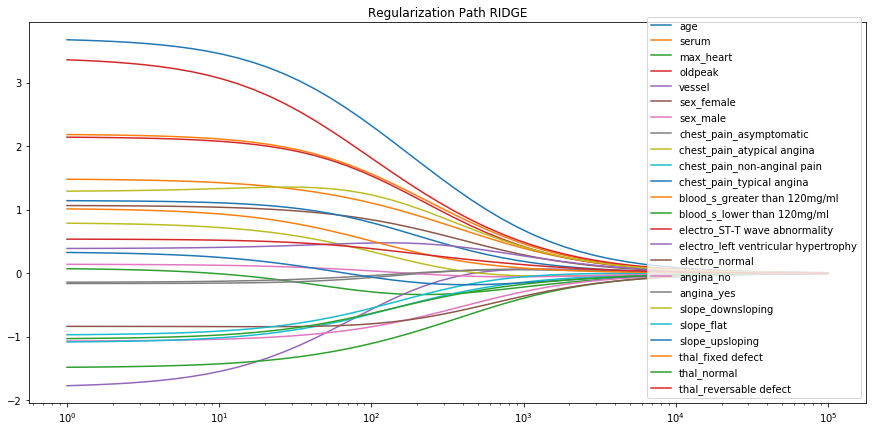

In [77]:
#Regluarización con Ridge Regression


from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

De acuerdo con la teoría de regularización, el objetivo es ignorar los atributos que tengan coeficiente 0, en este sentido, se observa que mientras más grande sea el valor de lambda, más atributos tienen coeficientes cercanos a 0, pero al mismo tiempo, los coeficientes de cada característica son más parecidos entre sí, por lo que se pierde el objetivo de la regularización. Por otra parte, es sabido teóricamente que l2 no genera soluciones verdaderamente dispersas, lo que queda comprobado en este gráfico al notar que pocos valores son 0 al mismo tiempo.

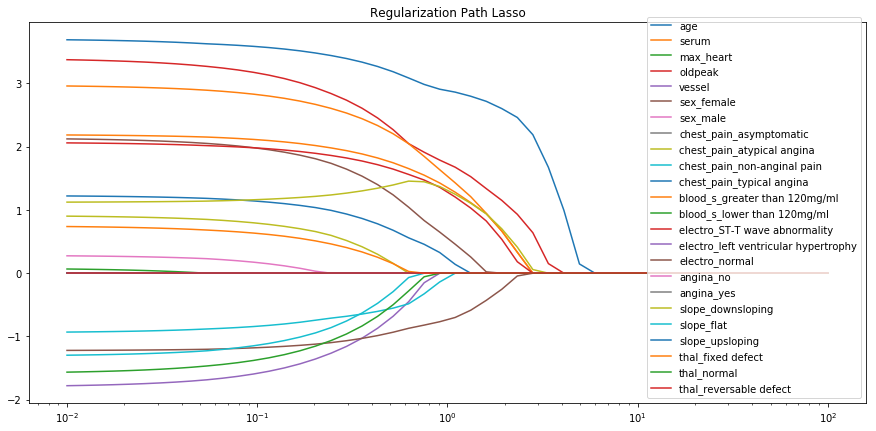

In [78]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
    
#plot again

names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path Lasso')
plt.legend(loc='lower right')
plt.show()

En primer lugar, se observa que, a diferencia de l2, todos los coeficientes tienden a 0 con un valor no tan grande de lambda, es decir, uno menor a 100, lo que ya de por si indica que genera valores más dispersos que l2. Esto se comprueba también al observar la gráfica, con lo que se concluye que l1 resulta mejor método de regularización que l2. Por otra parte, por el tamaño de los datos no se puede notar la desventaja de este método. 

In [79]:
from ipywidgets import interactive

#l2
def train_model2(param):
    model = Ridge(fit_intercept=True, solver='svd')
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
    
p_min = -3
p_max = 2
interactive(train_model2, param=(p_min,p_max))

interactive(children=(IntSlider(value=-1, description='param', max=2, min=-3), Output()), _dom_classes=('widge…

In [80]:
#l1

def train_model1(param):
    model = Lasso(fit_intercept=True)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))

interactive(train_model1, param=(p_min,p_max))

interactive(children=(IntSlider(value=-1, description='param', max=2, min=-3), Output()), _dom_classes=('widge…

Para ambos casos, los valores óptimos son en los que los errores de  entrenamiento se acercan más a los errores en  testing, esto para evitar o más que se pueda generar overfitting o underfitting, es por esto que para l2 se elige un valor de Alpha de 10, y para l1 uno de 0.1, lo que de cierta forma confirma también lo expresado anteriormente respecto de las diferencias entre el efecto de la variación de lambda en l2 y l1.

In [81]:
err=[]
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = []
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            coefi_candidate=model.coef_
            score_candidates.append((abs(coefi_candidate[len(indexes)-1]), candidate))
            residuals_train =  predictions_train - y
            error_candidate =  np.mean(np.power(residuals_train, 2))
            err.append(error_candidate)
        score_candidates.sort(reverse=True)
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s "%names_x[best_candidate])
        print ("totalvars=%d, score = %f"%(len(indexes),best_new_score))
    return selected
features_fss = fss(Xstd_train, reg_label_train, names_regressors)
need_feat = features_fss[:5]

selected = age 
totalvars=1, score = 5.088104
selected = slope_downsloping 
totalvars=2, score = 3.194306
selected = electro_ST-T wave abnormality 
totalvars=3, score = 2.377413
selected = serum 
totalvars=4, score = 2.379613
selected = blood_s_lower than 120mg/ml 
totalvars=5, score = 2.110205
selected = oldpeak 
totalvars=6, score = 2.262152
selected = vessel 
totalvars=7, score = 1.775474
selected = chest_pain_non-anginal pain 
totalvars=8, score = 1.465160
selected = sex_male 
totalvars=9, score = 1.515031
selected = blood_s_greater than 120mg/ml 
totalvars=10, score = 1.598267
selected = chest_pain_asymptomatic 
totalvars=11, score = 1.321592
selected = thal_normal 
totalvars=12, score = 1.528813
selected = electro_left ventricular hypertrophy 
totalvars=13, score = 1.320239
selected = slope_upsloping 
totalvars=14, score = 1.211998
selected = sex_female 
totalvars=15, score = 1.063368
selected = slope_flat 
totalvars=16, score = 0.908077
selected = electro_normal 
totalvars=17, s

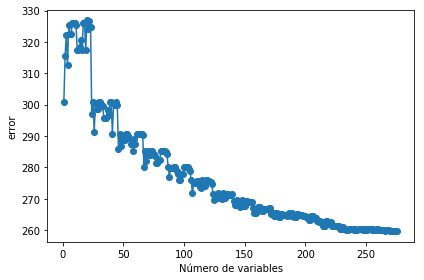

In [82]:

# Se grafican los errores obtenidos en el conjunto de entrenamineto
plt.plot(range(1, len(err) + 1), err, marker='o')
plt.xlabel('Número de variables')
plt.ylabel('error')
plt.tight_layout()
plt.show()

In [83]:
#función para juntar dos listas en una lista que de tuplas de dos elementos 
def merge(list1, list2): 
    merged_list = [(p1, p2) for idx1, p1 in enumerate(list1)  
    for idx2, p2 in enumerate(list2) if idx1 == idx2] 
    return merged_list 


def fss2(x, y, names_x,cant):
    names_x = np.array(names_x)
    model = LinearRegression(fit_intercept=True, n_jobs=1)
    predictions_train = model.fit(x, y).predict(x)
    coefi_candidate=model.coef_
    order=merge(coefi_candidate,names_x)
    order.sort(key=lambda tup: tup[0],reverse=True)
    selected=order[:cant]
    return selected

features_fss2 = fss2(Xstd_train, reg_label_train, names_regressors,5)
print("The selected features are: ",features_fss2)

#la heurística utilizada es báscamente la mism anterior, fijándose en las variables de mayor score en la regresión lineal original
#en este caso, como sólo debe entrenarse una vez, luego de entrenar el modelo se ordenan los coeficientes de las variables
#y se retorna la cantidad ae features que se buscan obtener

The selected features are:  [(3.7035748797812866, 'age'), (3.3980915072769866, 'oldpeak'), (2.1922264994308467, 'serum'), (2.1499996842021827, 'electro_ST-T wave abnormality'), (1.4869910138756564, 'blood_s_greater than 120mg/ml')]


In [84]:
#función que agrega datos falso, y muestra en un gráfico cómo va cambiando la forma en que se regularizan de acuerdo al valor de lambda
def fake_it(D,N,mu,std):
    F = np.random.normal(loc = mu, scale = std, size=(N,D) ) #fake features
    X_new_train= np.concatenate([Xstd_train, F], axis=-1)


    alphas_ = np.logspace(2,-2,base=10)
    coefs = []
    model = Lasso(fit_intercept=True)
    for a in alphas_:
        model.set_params(alpha=a)
        model.fit(X_new_train, reg_label_train)
        coefs.append(model.coef_[24:34])

    #plot again

    fake=["fake1","fake2","fake3","fake4","fake5","fake6","fake7","fake8","fake9","fake10"]
    names_regressors = np.concatenate((df.columns, fake), axis=None)
    plt.figure(figsize=(15,7))
    for y_arr, label in zip(np.squeeze(coefs).T, fake):
        plt.plot(alphas_, y_arr, label=label)
    plt.legend()
    plt.xscale('log')
    plt.title('Regularization Path Lasso')
    plt.legend(loc='lower right')
    plt.show()
    



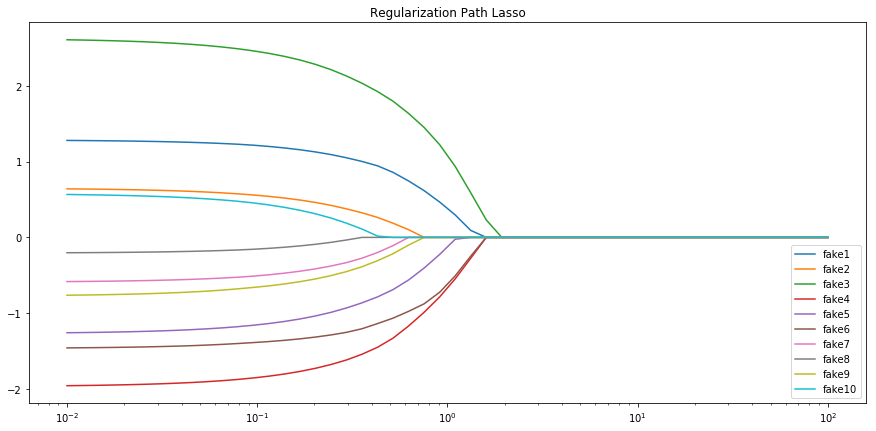

In [85]:
#ejecución con desviación estandar de 1
fake_it(10,184,0,1)

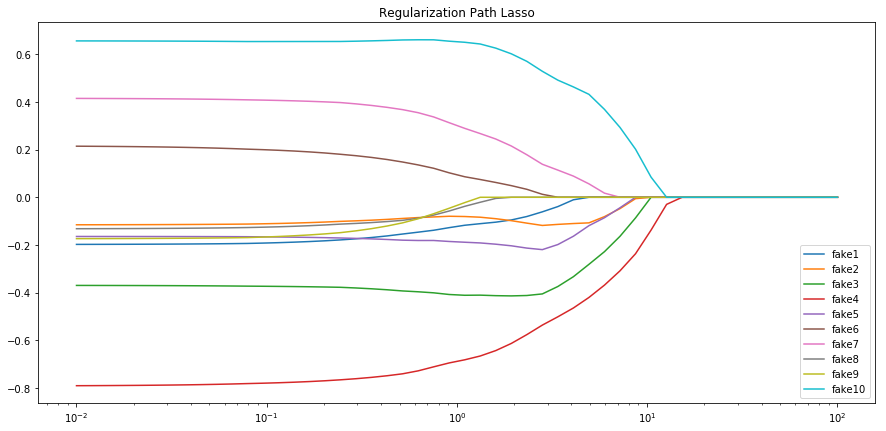

In [86]:
#ejecución con desviación estandar de 5
fake_it(10,184,0,5)

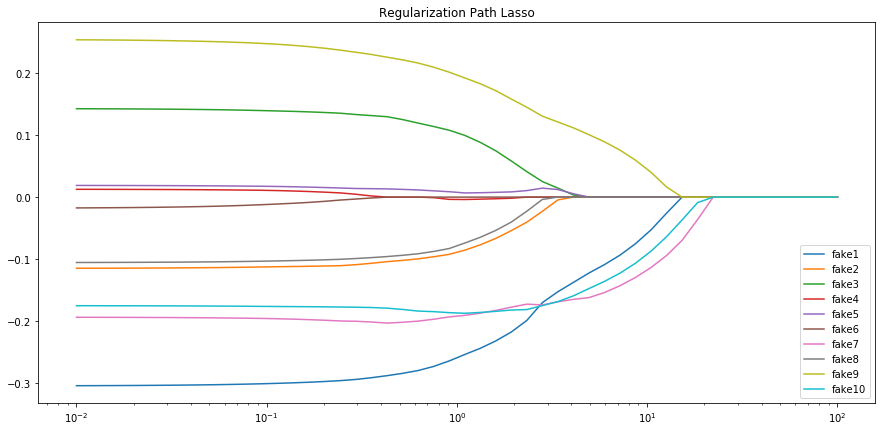

In [87]:
#ejecución con desviación estandar de 10
fake_it(10,184,0,10)

En los gráficos anteriormente presentados se nota claramente la relación de la desviación estándar de los datos con su eliminación en el proceso de regularización, notando que a mayor desviación estándar la tendencia a ser eliminados de los valores disminuye.

In [88]:
#predicción de la presión sanguínea de los pacientes en base a modelo lasso

mask_norm = class_label_train == 0 
model = Lasso(fit_intercept=True)
model.set_params(alpha=0.1)
model.fit(Xstd_train[mask_norm], reg_label_train[mask_norm])
...
blood_p_tr = model.predict(Xstd_train) 
blood_p_te = model.predict(Xstd_test) 

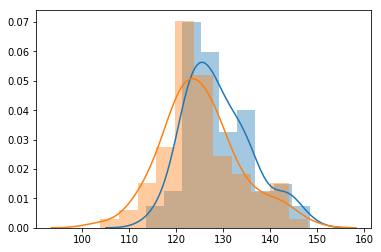

In [89]:
#predicción entre enfermos o sanos

import seaborn as sns
sns.distplot(blood_p_tr[mask_norm], label="normal behavior")
sns.distplot(blood_p_tr[~mask_norm], label="ill person behavior")
plt.show()

p_up=140
p_low=122
#determinados de tal forma que se abarca la región más probable
def predict_umbr(data, umbral_up, umbral_low):
    preds = []
    for value in data:
        if value > umbral_up or value < umbral_low:
            preds.append(1) #presencia
        else:
            preds.append(0)
    return np.asarray(preds)
pred_train = predict_umbr(blood_p_tr, p_up, p_low)
pred_test = predict_umbr(blood_p_te, p_up, p_low)



In [90]:
from sklearn.metrics import accuracy_score
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test))

#de acuerdo a los resultados, al ser mayor a 50 en trin y en test el accuracy no es necesario cambiar los umbrales

Score train:  0.625
Score test:  0.6511627906976745


In [91]:
#comparación con perceptrón

from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(Xstd_train, class_label_train)
pred_train = model.predict(Xstd_train) 
pred_test = model.predict(Xstd_test)
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 

Score train:  0.8315217391304348
Score test:  0.8023255813953488


De acuerdo con lo observado, la principal ventaja del enfoque del perceptrón es que su porcentaje de acierto es bastante mayor a la del enfoque anteriormente, lo que se explica porque, en simples palabras, obtiene los datos de forma más directa, lo que reduce el error obtenido en el caso anterior por la selección de los umbrales. Sin embargo, este modelo presenta una tendencia mayor a overfitting que el anterior, lo que pasa a ser su principal desventaja, además, el uso de clases linealmente spearables es un supuesto que no puede ser comprobado en la mayoría de los casos, lo que impide que este enfoque sea generalizable.

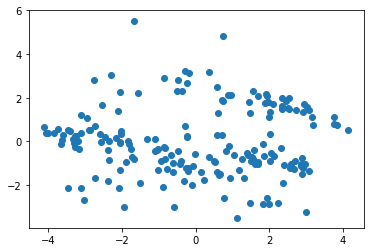

In [92]:
#uso de técnica de reducción de dimensionalidad PCA

from sklearn.decomposition import PCA
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1])
plt.show()

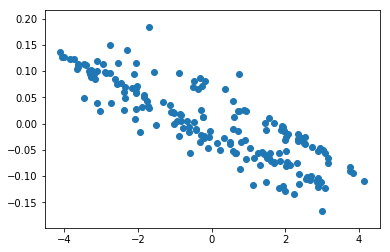

In [93]:
#uso de técnica de reducción de dimensionalidad ICA

from sklearn.decomposition import FastICA
d = 2
ica_model = FastICA(n_components=d)
ica_model.fit(Xstd_train)
X_ica_train = ica_model.transform(Xstd_train)
X_ica_test = ica_model.transform(Xstd_test)
plt.scatter(X_pca_train[:,0], X_ica_train[:,1])
plt.show()

La diferencia más notoria entre el uso de PCA e ICA se encuentra en los rangos y en la dispersión de los valores nuevos generados por ambos métodos, siendo valores menos dispersos en el caso de ICA, abarcando valores en el eje y mucho más cercanos a 0 que los generados en PCA, lo que en sí se debe a la forma en la que trabajan ambos métodos. Aeás, los datos generados por ICA siguen una distribución mucho más uniforme, en el sentido de que prácticamente siguen una recta con pendiente negativa

In [94]:
#uso de modelo con nuevas dimensiones
mask_norm = class_label_train == 0 
model = Lasso(fit_intercept=True)
model.set_params(alpha=0.1)
model.fit(X_pca_train[mask_norm], reg_label_train[mask_norm])


blood_pca_tr = model.predict(X_pca_train ) 
blood_pca_te = model.predict(X_pca_test)

pca_pred_train = predict_umbr(blood_pca_tr, p_up, p_low)
pca_pred_test = predict_umbr(blood_pca_te, p_up, p_low)

print("Score train: ",accuracy_score(class_label_train, pca_pred_train))
print("Score test: ",accuracy_score(class_label_test,pca_pred_test))

Score train:  0.5597826086956522
Score test:  0.5465116279069767


Claramente se nota que, manteniendo ambos umbrales, la capacidad de predicción del modelo disminuye al modificar la dimensionalidad de los datos, lo que puede tener relación con la relación existente entre las 24 dimensiones en este caso, ya que al pasar a 2 se elimina la relación entre ellas, lo que si se elige un número muy bajo de nueva dimensionalidad disminuye notablemente la capacidad predictora. A continuación, se propone una forma de elegir la nueva dimensión d:

In [95]:
#elección de nueva dimensión

def optimal_election(train, test,label_train):
    d = 2
    ret=0
    op_score_train=0
    op_score_test=1000
    while(d<len(train[0])):    
        pmodel = PCA(n_components=d)
        pmodel.fit(train)
        ptrain = pmodel.transform(train)
        ptest = pmodel.transform(test)
        mask_norm = class_label_train == 0 
        model = Lasso(fit_intercept=True)
        model.set_params(alpha=0.1)
        model.fit(ptrain[mask_norm], label_train[mask_norm])
        blood_pca_tr = model.predict(ptrain ) 
        blood_pca_te = model.predict(ptest)
        pred_train = predict_umbr(blood_pca_tr, p_up, p_low)
        pred_test = predict_umbr(blood_pca_te, p_up, p_low)
        acc_train=accuracy_score(class_label_train, pred_train)
        acc_test=accuracy_score(class_label_test,pred_test)
        if (acc_train>op_score_train and abs(acc_train-acc_test)<abs(op_score_train-op_score_test)):
            ret=d
            op_score_train=acc_train
            op_score_test=acc_test
        d+=1
    print("Final score train: ",op_score_train)
    print("Final score test: ",op_score_test)   
    return ret

print ("Optimal dimension: ",optimal_election(Xstd_train,Xstd_test, reg_label_train))

Final score train:  0.5760869565217391
Final score test:  0.5813953488372093
Optimal dimension:  14


El algoritmo desarrollado funciona de tal forma que elige finalmente la dimensionalidad que genera el menor overfitting o underfitting posible, todo esto mientras entrega el mejor valor posible de predicción en el entrenamiento. Mediante el uso de este algoritmo se determina que la dimensión óptima en este caso es 14, siendo su nivel de predicción menor que la dimensión original, pero reduciendo el overfitting y underfitting. Cabe mencionar que el algoritmo desarrollado fue pensado específicamente en este problema.

## 2.- Predicción de edad

In [96]:
#parte 2

import scipy.io as sio

#carga de datos 
test2 = sio.loadmat("eventest.mat")
train2= sio.loadmat("eventrain.mat")


#definición de función de error a utilizar
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [97]:
#obtención de datos
data = train2["trcoll"][0][0] # is "tecoll" for testing set
age_true = data[1] #target

fcoefs = data[3]   # Fisherface space
aceGist = data[4]  # GIST features
img = data[5]   # 
acePosSize = data[9]   # Size of face position

#estandarización normal de variables


std1 = StandardScaler()
std2 = StandardScaler()
std3 = StandardScaler()
std5 = StandardScaler()

std1.fit(fcoefs)
std2.fit(aceGist)
std3.fit(img)
std5.fit(acePosSize)

ffcoefs = std1.transform(fcoefs) 
faceGist = std2.transform(aceGist)
fimg = std3.transform(img)
facePosSize = std5.transform(acePosSize)


En primer lugar, se considera que los atributos data[0] y data[2] no son buenos predictores, ya que, en primer lugar, data[0] representa  valores que son, en simples palabras, adicionales, mientras que data[2] al ser género, sufre en primera instancia al ser binario, lo que requeriría un tratamiento especial de los datos, generando tiempo de cómputo extra, y por otra parte, el género es una característica que no tiene directa relación con lo que se busca. Luego, entre los features elegidos se buscará elegir los que generan menos error, ya sea mediante regresión lineal simple, reducción de dimensionalidad o regularización. Luego, de probará si tomando éstos en conjunto se genera menor error que el menor por si solo. Es necesario mencionar que, los atributos que no se encuentran definidos de acuerdo al criterio trabajado no tienen mayor relevancia,ya sea por desconocer el tipo del dato o por la poca probabilidad de aportar a la clasificación. Finalmente, luego de intentar estandarizar para poder entrenar de mejor forma los modelos, se encuentra que Face Data corresponde a valores no numéricos, que no entregan major información de acuerdo a lo que se busca predecir, por lo que tampoco se considera en este desarrollo.

In [98]:
#para Fisherface space se comienza definiendo un modelo de regresión lineal simple, calculando su error luego
#se comparará con el error obtenido con otros métodos, como regularización o disminución de dimensionalidad


fmodel=LinearRegression(fit_intercept=True)
fmodel.fit(ffcoefs,age_true)
predff= fmodel.predict(ffcoefs)
print ("Error with basic linear regression for ffcoefs: ",mean_absolute_percentage_error(age_true,predff))

#reduccion de dimensionalidad PCA
d = 33 
pca_model = PCA(n_components=d)
pca_model.fit(ffcoefs)
pca_predff = pca_model.transform(ffcoefs)
fmodel=LinearRegression(fit_intercept=True)
fmodel.fit(pca_predff,age_true)
predff= fmodel.predict(pca_predff)
print ("Error with PCA for ffcoefs with linear regression: ",mean_absolute_percentage_error(age_true,predff))

#reduccion de dimensionalidad ICA
d = 33 
ica_model = FastICA(n_components=d)
ica_model.fit(ffcoefs)
ica_predffs = ica_model.transform(ffcoefs)
fmodel=LinearRegression(fit_intercept=True)
fmodel.fit(ica_predffs,age_true)
predff= fmodel.predict(ica_predffs)
print ("Error with ICA for ffcoefs with linear regression: ",mean_absolute_percentage_error(age_true,predff))

Error with basic linear regression for ffcoefs:  309.85175921590206
Error with PCA for ffcoefs with linear regression:  312.3045272173431
Error with ICA for ffcoefs with linear regression:  312.30452721734287


In [99]:
#regularización para ffcoefs

p_min=-10
p_max=0
def train_model1(param):
    modell = Lasso(fit_intercept=True)
    A = 10**(param)
    print("Param alpha= ",A)
    modell.set_params(alpha=A)
    modell.fit(ffcoefs, age_true)
    print("MSE train: ", mean_squared_error(age_true, modell.predict(ffcoefs) ))

interactive(train_model1, param=(p_min,p_max))

interactive(children=(IntSlider(value=-5, description='param', max=0, min=-10), Output()), _dom_classes=('widg…

En primer lugar, la variable ffcoefs de por si entrega un gran error entrenándola sin reducir su dimensionalidad, así mismo, al aplicar técnicas para evitar el overfitting y recudir este error prácticamente no se logra mejorar nada, lo que puede tener relación con la gran cantidad de dimensiones existente, siendo en este caso 34. A continuación, mediante un análisis similar en las oras 4 variables se podrá comparar los resultados acá obtenidos con los de otras variables.

In [100]:
#para GISTfeatures se comienza definiendo un modelo de regresión lineal simple, calculando su error luego
#se comparará con el error obtenido con otros métodos, como regularización o disminución de dimensionalidad


gmodel=LinearRegression(fit_intercept=True)
gmodel.fit(faceGist,age_true)
predg= gmodel.predict(faceGist)
print ("Error with basic linear regression for faceGist: ",mean_absolute_percentage_error(age_true,predg))

#reduccion de dimensionalidad PCA
d = 597 #580
pca_model = PCA(n_components=d)
pca_model.fit(faceGist)
pca_predg = pca_model.transform(faceGist)
modelg=LinearRegression(fit_intercept=True)
modelg.fit(pca_predg,age_true)
predg= modelg.predict(pca_predg)
print ("Error with PCA for faceGist with linear regression: ",mean_absolute_percentage_error(age_true,predg))


Error with basic linear regression for faceGist:  258.8798999786377
Error with PCA for faceGist with linear regression:  258.9653730392456


In [101]:
#regularización para faceGist

p_min=-1
p_max=2
def train_model1(param):
    modell = Lasso(fit_intercept=True)
    A = 10**(param)
    print("Param alpha= ",A)
    modell.set_params(alpha=A)
    modell.fit(faceGist, age_true)
    print("MSE train: ", mean_squared_error(age_true, modell.predict(faceGist) ))
    print("MSE test: ", mean_squared_error(age_true, modell.predict(faceGist) ))

interactive(train_model1, param=(p_min,p_max))

interactive(children=(IntSlider(value=0, description='param', max=2, min=-1), Output()), _dom_classes=('widget…

En este caso, FaceGist presenta un error bastante menor al anterior feature, sin embargo, nuevamente los procesos de regularización y reducción de dimensionalidad no generan mayores mejoras en el resultado de predicción. Por otra parte, en el proceso de reducción de dimensionalidad usando ICA se encuentra que deja de ser óptimo en tiempos desde aproximadamente reducción a 50 features, lo que debe ser considerado en el desarrollo siguiente, siendo esta la razón principal por la que no se incluye en este caso.

In [102]:
#para fimg se comienza definiendo un modelo de regresión lineal simple, calculando su error luego
#se comparará con el error obtenido con otros métodos, como regularización o disminución de dimensionalidad


imgmodel=LinearRegression(fit_intercept=True)
imgmodel.fit(fimg,age_true)
predimg= imgmodel.predict(fimg)
print ("Error with basic linear regression for fimg: ",mean_absolute_percentage_error(age_true,predimg))
#reduccion de dimensionalidad PCA


d =  2940
pca_model = PCA(n_components=d)
pca_model.fit(fimg)
pca_fimg = pca_model.transform(fimg)
imgmodel=LinearRegression(fit_intercept=True)
imgmodel.fit(pca_fimg,age_true)
predimg= imgmodel.predict(pca_fimg)
print ("Error with PCA for fimg with linear regression: ",mean_absolute_percentage_error(age_true,predimg))



Error with basic linear regression for fimg:  96.39929283243728
Error with PCA for fimg with linear regression:  101.93138303148778


In [103]:
#regularización para fimg

p_min=0
p_max=5
def train_model1(param):
    modell = Lasso(fit_intercept=True)
    A = 10**(param)
    print("Param alpha= ",A)
    modell.set_params(alpha=A)
    modell.fit(fimg, age_true)
    print("MSE train: ", mean_squared_error(age_true, modell.predict(fimg) ))

interactive(train_model1, param=(p_min,p_max),var=fimg)

interactive(children=(IntSlider(value=2, description='param', max=5), Output()), _dom_classes=('widget-interac…

En primer lugar, es necesario mencionar que esta variable presenta un gran número de dimensiones, siendo alrededor de 2900, por lo que reducir la dimensión de cualquier forma costará una gran cantidad de tiempo, así como usar esta variable. Es por esto que, considerando que los resultados óptimos de PCA e ICA  suelen ser similares, en este caso sólo se utilizó PCA. Además, es importante hacer notar que esta variable es la que entregó menor error.

In [109]:
#para facePosSize se comienza definiendo un modelo de regresión lineal simple, calculando su error luego
#se comparará con el error obtenido con otros métodos, como regularización o disminución de dimensionalidad


psmodel=LinearRegression(fit_intercept=True)
psmodel.fit(facePosSize,age_true)
predps= psmodel.predict(facePosSize)
print ("Error with basic linear regression for facePosSize: ",mean_absolute_percentage_error(age_true,predps))

#reduccion de dimensionalidad PCA
d = 6
pca_model = PCA(n_components=d)
pca_model.fit(facePosSize)
pca_predps = pca_model.transform(facePosSize)
psmodel=LinearRegression(fit_intercept=True)
psmodel.fit(pca_predps,age_true)
predps= psmodel.predict(pca_predps)
print ("Error with PCA for facePosSize with linear regression: ",mean_absolute_percentage_error(age_true,predps))

#reduccion de dimensionalidad ICA
d = 6
ica_model = FastICA(n_components=d)
ica_model.fit(facePosSize)
ica_predps = ica_model.transform(facePosSize)
psmodel=LinearRegression(fit_intercept=True)
psmodel.fit(ica_predps,age_true)
predps= psmodel.predict(ica_predps)
print ("Error with ICA for facePosSize with linear regression: ",mean_absolute_percentage_error(age_true,predps))

Error with basic linear regression for facePosSize:  415.3575897216797
Error with PCA for facePosSize with linear regression:  415.3566837310791
Error with ICA for facePosSize with linear regression:  415.3938201753099


In [105]:
#regularización para facePosSize

p_min=-2
p_max=2
def train_model1(param):
    modell = Lasso(fit_intercept=True)
    A = 10**(param)
    print("Param alpha= ",A)
    modell.set_params(alpha=A)
    modell.fit(facePosSize, age_true)
    print("MSE train: ", mean_squared_error(age_true, modell.predict(facePosSize) ))

interactive(train_model1, param=(p_min,p_max),var=ffcoefs)

interactive(children=(IntSlider(value=0, description='param', max=2, min=-2), Output()), _dom_classes=('widget…

Luego de analizar los valores de la variable 4, la cual es la que tiene menos dimensiones (7), se puede notar a tendencia de que el error de predicción de una variable por si sola disminuye de acuerdo a la cantidad de dimensiones que tenga, sin embargo, por ejemplo, para la variable 3 si bien es cierto que el error es bastante menor al resto, su tiempo de cómputo llega a ser difícil de manejar, es por esto que se probará qué pasa si se juntan las dos variables con menos dimensiones, probando todos los procedimientos acá realizados. 
Por otra parte, es importante señalar que el error acá usado puede verse afectado en algunos casos por la presencia de valores igual a 0.

Otra conclusión importante del trabajo que se acaba de realizar es que en este caso, PCA e ICA  entregan resultados similares, pero ICA muestra mayor demora en tiempos, por lo que de acá en adelante para procesos similares sólo se usará PCA para reducir dimensionalidad

In [106]:
##juntar facePosSize y Fisherface space

snew=[]
for i in range(0,len(ffcoefs)):
    snew.append([*ffcoefs[0], *facePosSize[0]])


#luego, se realizan ambos procesos anteriormente desarrollados con este nuevo conujto de variables


#regresión lineal normal
psmodel=LinearRegression(fit_intercept=True)
psmodel.fit(snew ,age_true)
predps= psmodel.predict(snew )
print ("Error with basic linear regression for snew : ",mean_absolute_percentage_error(age_true,predps))



Error with basic linear regression for snew :  3497593455989.135


In [107]:
#regularización para nuevo conjunto 


p_min=-20
p_max=-10
def train_model1(param):
    modell = Lasso(fit_intercept=True)
    A = 10**(param)
    print("Param alpha= ",A)
    modell.set_params(alpha=A)
    modell.fit(snew, age_true)
    print("MSE train: ", mean_squared_error(age_true, modell.predict(snew) ))

interactive(train_model1, param=(p_min,p_max),var=ffcoefs)

interactive(children=(IntSlider(value=-15, description='param', max=-10, min=-20), Output()), _dom_classes=('w…

Al juntar ambas variables mencionadas anteriormente, se obtiene un error demasiado alto utilizando regresión lineal sin ningún otro procedimiento, error que mejora notablemente al usar regularización, ya que mediante este método se logran considerar sólo las dimensiones más relevantes en este caso, aún así, el error sigue siendo alto comparado con lo experimentado con el resto de las variables, por lo tanto, se descarta completamente esta idea. Además, al ser variables muy pequeñas, no se pudo usar ninguno de los métodos de reducción de dimensionalidad, ya que se obtenían diversos tipos de errores.

De esta forma, se elige el modelo de regresión lineal generado con las dimensiones de fimg, a continuación se mostrará el error obtenido si se usa el conjunto de prueba, para analizar cuanto es el overfitting generado y concluir.

In [108]:
#se busca ver el valor con el conjutno testing y se calcula su error de preddicción para concluir

dat = test2["tecoll"][0][0] # is "tecoll" for testing set
age_test = dat[1]
img_test = dat[5]

imgmodel=LinearRegression(fit_intercept=True)
imgmodel.fit(fimg,age_true)
pred_test= imgmodel.predict(img_test)
print ("Error for best training model in test : ",mean_absolute_percentage_error(age_test,pred_test))

Error for best training model in test :  71284.05800482107


El error obtenido acá muestra un overfitting extremadamente grande en este modelo, lo que puede deberse a la gran cantidad de dimensiones utilizadas en este caso, serían necesario realizar más pruebas con los otros modelos desarrollados para comprobar verdaderamente esta tendencia, pero con los datos obtenidos se puede comprobar que ninguno de los modelos desarrollados daría los resultados requeridos, ya que los que posiblemente no generan tanto overfitting tienen un error considerablemente alto generalmente. Una gran dificultad encontrada para poder desarrollar estos modelos es la imposibilidad de conocer la verdadera naturaleza de cada una de las variables, lo que impide saber cuales serían las más adecuadas para utilizar en este caso, pero es posible que, desarrollando técnicas de selección de atributos no abordadas acá se mejoren los resultados obtenidos.

<a id="refs"></a>
## Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] Ethem Alpaydin. *Machine Learning*. 2014.  
[3] Hyvärinen, A., & Oja, E. (2000). *Independent component analysis: algorithms and applications*. Neural networks, 13(4-5), 411-430.